In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/CoderHouse/46300/Clase 10 - Herramientas de visualización/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/CoderHouse/46300/Clase 10 - Herramientas de visualización


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Grafico de barras

In [33]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.Survived.unique()

AttributeError: ignored

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [57]:
df_n=df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).count().reset_index()
df_n.head(6)

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [52]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Titulo como objeto')

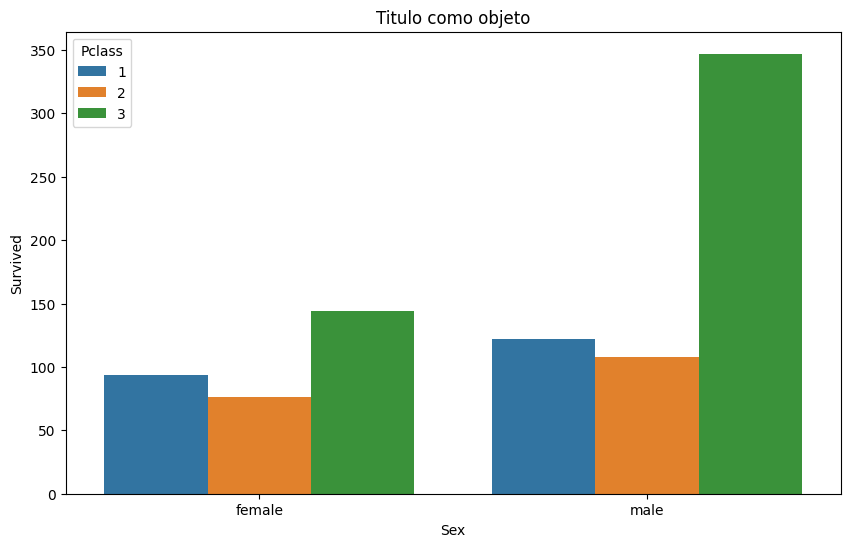

In [68]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df_n);
# plt.title('Title como estado')
ax.set_title('Titulo como objeto')
# ax.bar_label(ax.containers[0], fontsize=10);
# ax.bar_label(ax.containers[1], fontsize=10);
# ax.bar_label(ax.containers[2], fontsize=10);


In [46]:
df_n2=df[['Survived','Pclass', 'Sex']].groupby(by=['Sex','Pclass']).count().reset_index()
df_n2.head()

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108


In [ ]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()


In [65]:
df_pivot = df_n2.pivot(index='Pclass', columns='Sex', values='Survived')
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in df_n2.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


AttributeError: ignored

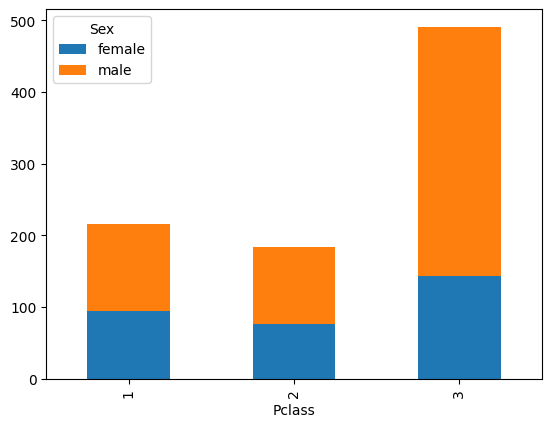

In [64]:
# sns.Plot(df_n, x="Pclass", color="sex").add(sns.Bar(), sns.Count(), sns.Stack())
# stacked=True
# df_n2 = df[['Pclass', 'Fare', 'Sex']]
# df_n2

# ax = sns.barplot(x='Sex', y='Fare', data=df, hue='Pclass')
df_pivot = df_n2.pivot(index='Pclass', columns='Sex', values='Survived')
ax = df_pivot.plot(kind='bar', stacked=True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
# plt.show()
print(ax.containers[1])
#df.plot(kind='bar', stacked=True, color=['red', 'skyblue'])


Text(0.5, 1.0, 'Monthly Temperatures in a year')

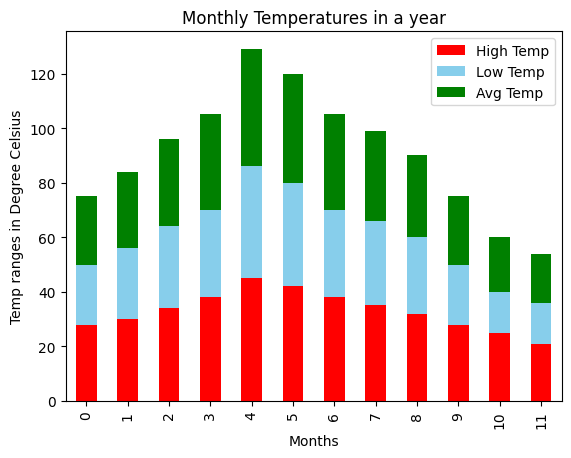

In [28]:
# import necessary libraries
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

# create DataFrame
df = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
                                 38, 35, 32, 28, 25, 21],
                   'Low Temp': [22, 26, 30, 32, 41, 38,
                                32, 31, 28, 22, 15, 15],
                   'Avg Temp': [25, 28, 32, 35, 43, 40,
                                35, 33, 30, 25, 20, 18]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])


# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')

# title of plot
plt.title('Monthly Temperatures in a year')

In [22]:
df_n

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


# Histogramas

<Axes: xlabel='Fare', ylabel='Count'>

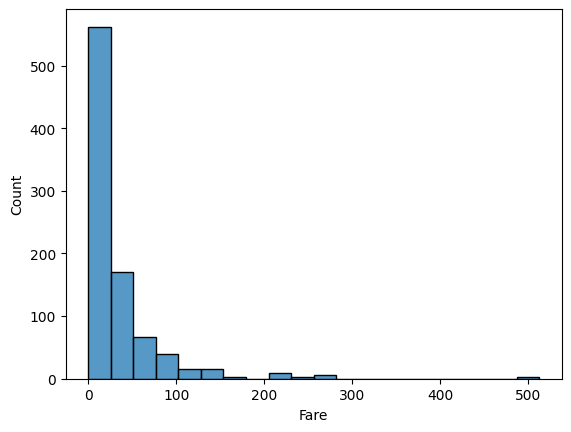

In [ ]:
sns.histplot(data=df, x="Fare",bins=20)

<Axes: xlabel='Age', ylabel='Count'>

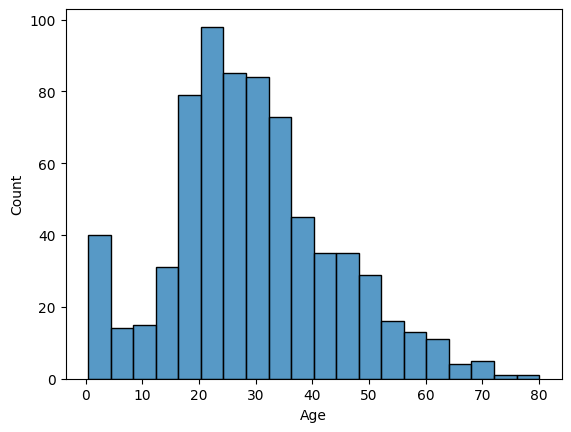

In [ ]:
sns.histplot(data=df, x="Age",bins=20)

# Lineplot

In [ ]:
ls

 Clase_10_2.ipynb   Clase_10.ipynb  'Time Series Data.csv'


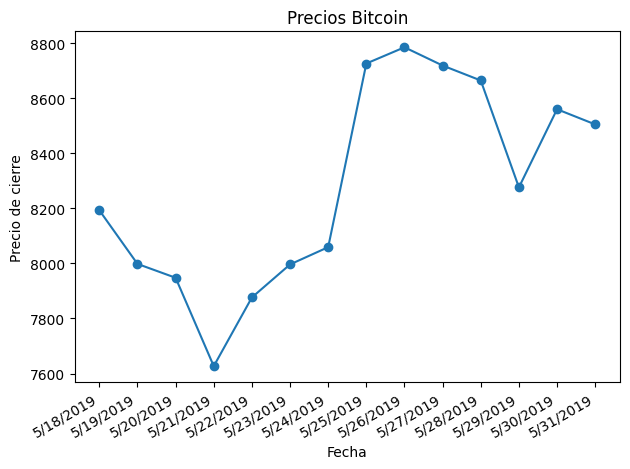

In [ ]:
data=pd.read_csv('Time Series Data.csv') # Leer el archivo
price_date=data['Date'] # extraer dos vectores uno para la fecha
price_close=data['Close'] # extraer el precio de cierre en vector
plt.plot_date(price_date, price_close, linestyle='solid') # Graficar la serie de tiempo
plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Precios Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.tight_layout() # Ajustar los ejes
plt.show() # mostrar la grafica

In [ ]:
data.Date= pd.to_datetime(data.Date)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321
5,2019-05-23,7876.500000,8165.450195,7801.569824,7996.399902,7996.399902,413162746
6,2019-05-24,7996.399902,8140.819824,7948.680176,8059.129883,8059.129883,179206342
7,2019-05-25,8059.129883,8779.000000,7894.529785,8726.230469,8726.230469,483663699
8,2019-05-26,8726.230469,8931.530273,8668.459961,8785.169922,8785.169922,507164714
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199
10,2019-05-28,8718.849609,8760.480469,8444.099609,8664.559570,8664.559570,380343928
11,2019-05-29,8664.559570,9065.889648,8027.209961,8276.250000,8276.250000,815525590
12,2019-05-30,8276.250000,8570.780273,8116.000000,8560.080078,8560.080078,500141087
13,2019-05-31,8550.629883,8576.339844,8459.650391,8504.980469,8504.980469,69915456


# Diagrama de dispersion

Text(0, 0.5, 'Precio de apertura')

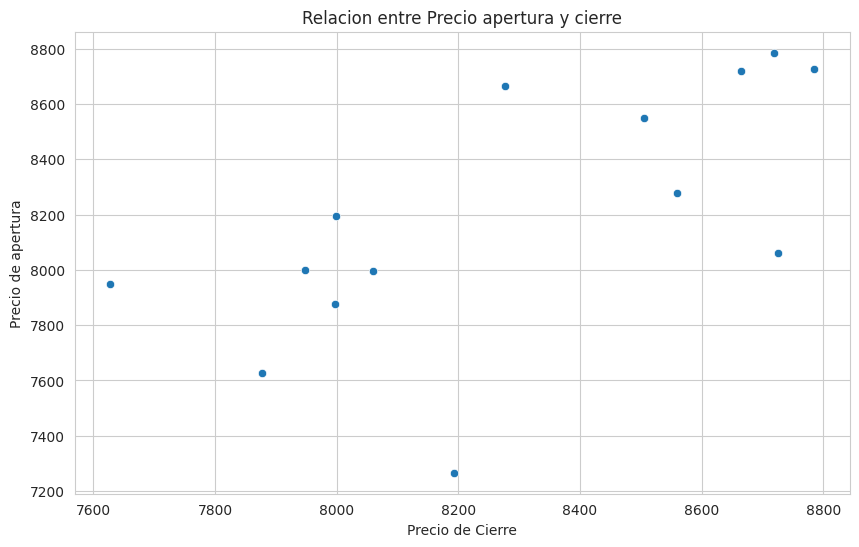

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Close, y= data.Open)
plt.title('Relacion entre Precio apertura y cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Precio de apertura')

In [ ]:
np.corrcoef(data.Close, data.Open)[0,1]

0.646006168285023

In [ ]:
# Matriz de correlacion
import numpy as np
np.corrcoef(data.Close, data.Open)

array([[1.        , 0.64600617],
       [0.64600617, 1.        ]])

# Boxplot

Text(0, 0.5, 'Tarifa')

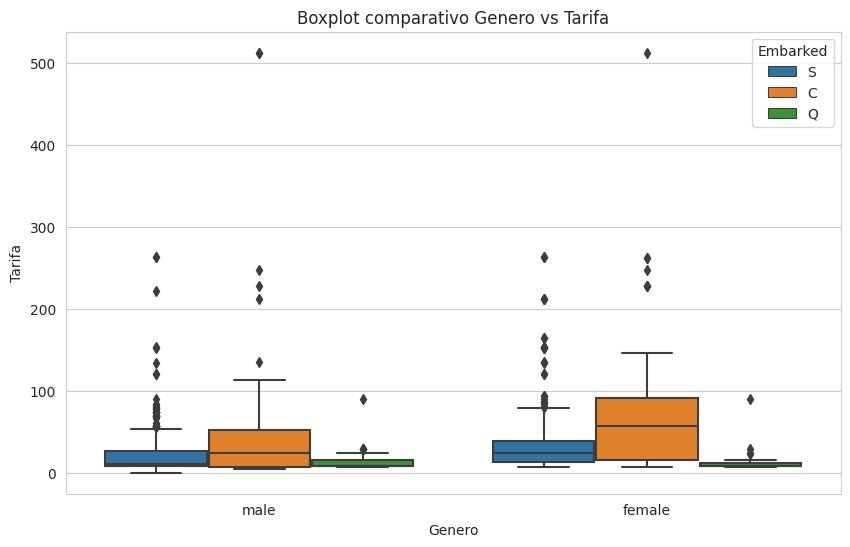

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

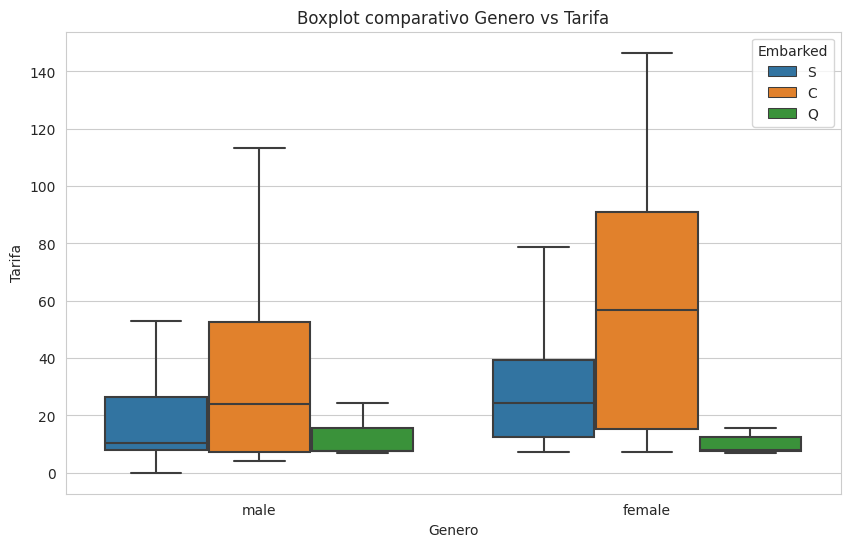

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked,showfliers=False)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

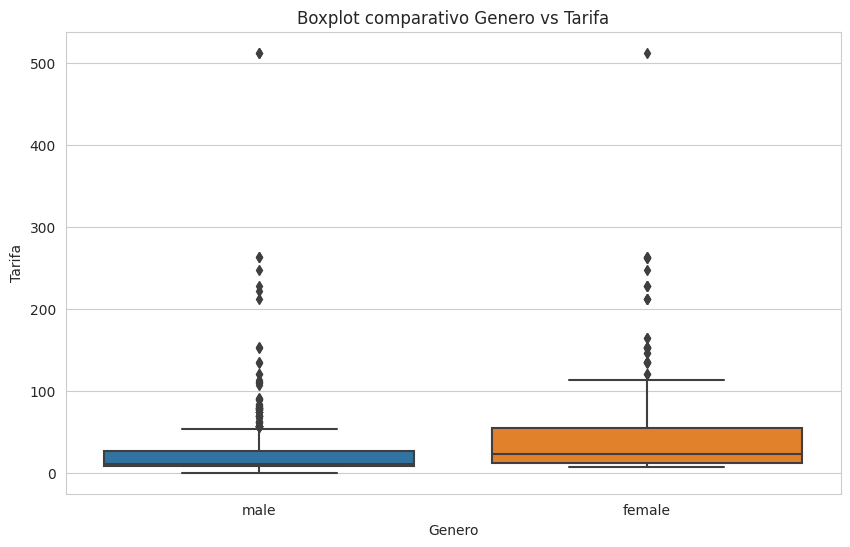

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

# Graficos de 3 dimensiones

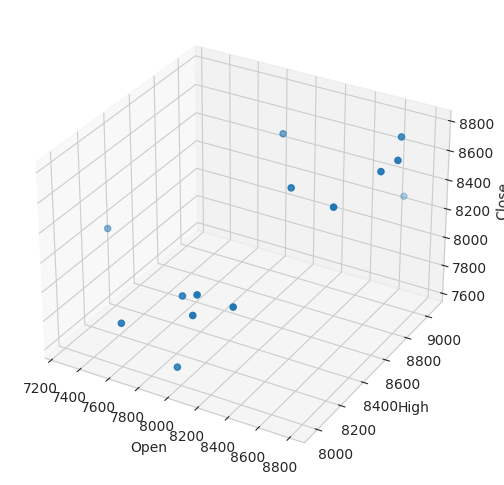

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

x = data.Open
y = data.High
z = data.Close

ax.set_xlabel("Open")
ax.set_ylabel("High")
ax.set_zlabel("Close")

ax.scatter(x, y, z)

plt.show()

# Radar plot

<ipython-input-42-992831ca991a>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df.index))


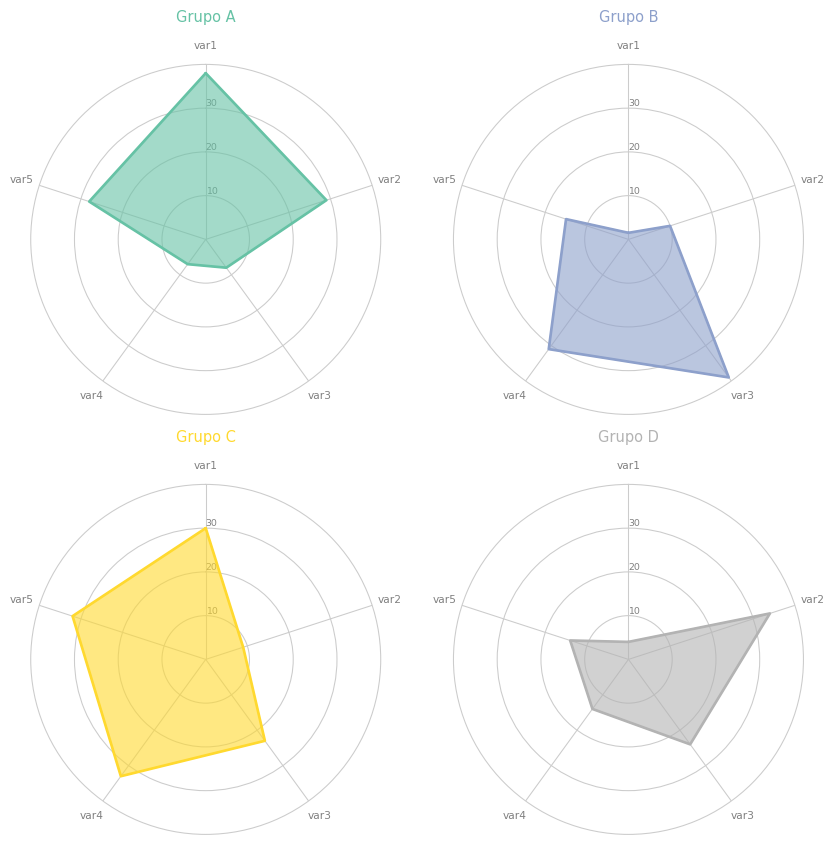

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Definir los datos
df = pd.DataFrame({
    'group': ['A','B','C','D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})

# ------- PARTE 1: Definir una función que haga un gráfico para una fila del conjunto de datos

def hacer_grafico_arana(fila, titulo, color):

    # Número de variables
    categories = list(df)[1:]
    N = len(categories)

    # Ángulo de cada eje en el gráfico
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializar el gráfico de araña
    ax = plt.subplot(2,2,fila+1, polar=True)

    # Si se quiere que el primer eje esté en la parte superior:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Dibujar un eje por variable + agregar etiquetas
    plt.xticks(angulos[:-1], categories, color='grey', size=8)

    # Dibujar etiquetas en el eje Y
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Valores de la fila actual
    valores = df.loc[fila].drop('group').values.flatten().tolist()
    valores += valores[:1]
    ax.plot(angulos, valores, color=color, linewidth=2, linestyle='solid')
    ax.fill(angulos, valores, color=color, alpha=0.6)

    # Agregar un título
    plt.title(titulo, size=11, color=color, y=1.1)

# ------- PARTE 2: Aplicar la función a todos los grupos
# Inicializar la figura
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Crear una paleta de colores
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Bucle para crear los gráficos
for fila in range(0, len(df.index)):
    hacer_grafico_arana(fila=fila, titulo='Grupo '+df['group'][fila], color=my_palette(fila))

plt.show()


### Conclusiones:

1. Con este código, se generan gráficos de araña (radar plots) para cada grupo en el DataFrame df.
2. Los gráficos muestran cómo se comportan las variables var1 a var5 en cada grupo.
3. Los ángulos representan las variables, y la distancia desde el centro del gráfico representa los valores de las variables.
4. Esto permite una comparación visual de los grupos en términos de estas variables.
5. Cada grupo tiene su propio gráfico y se utiliza una paleta de colores para distinguirlos.
6. Los gráficos de araña son útiles para resaltar las diferencias y similitudes entre múltiples grupos en función de varias variables.

#### Revisemos esta aplicación real:
https://www.researchgate.net/figure/Radar-chart-of-variables-by-countries-in-2015_fig1_332958165


# Graficos de Chernoff

In [ ]:
pip install ChernoffFace

In [ ]:
from ChernoffFace import *
import numpy
import matplotlib.cm
# Generar datos artificiales
numpy.random.seed(32)
data = numpy.random.rand(16, 12)
data.shape

(16, 12)

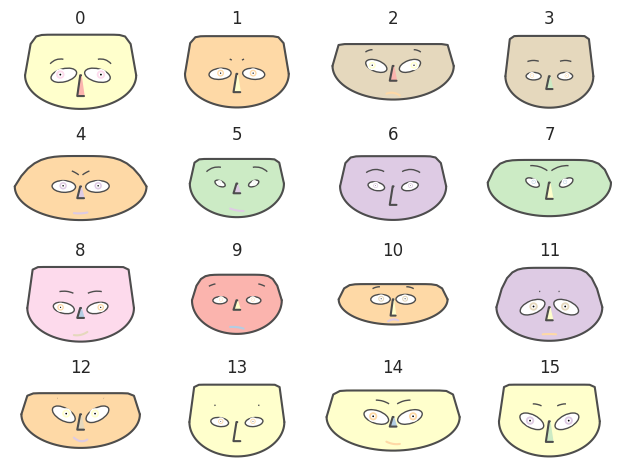

In [ ]:
fig = chernoff_face(data=data,
                    titles=[str(x) for x in list(range(len(data)))],
                    color_mapper=matplotlib.cm.Pastel1)

# Mostrarlo
fig.tight_layout()
matplotlib.pyplot.show()

In [ ]:
# Obtener los datos
from vega_datasets import data

# Mostrar los datos
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [ ]:
# Atributos para el radar plot.
factors = ['Acceleration', 'Displacement', 'Horsepower',
           'Miles_per_Gallon', 'Weight_in_lbs']

# Nueva escala de 0 a 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Hacer una transformacion lineal para cada variable a [0, 100].
for factor in factors:
  max_val = df[factor].max()
  min_val = df[factor].min()
  val_range = max_val - min_val
  df[factor + '_Adj'] = df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)


# Añadir el año a cada nombre del carro
df['Car Model'] = df.apply(lambda row: '{} {}'.format(row.Name, row.Year.year), axis=1)

# recortar y cambiar el nombre.
dft = df.loc[:, ['Car Model', 'Acceleration_Adj', 'Displacement_Adj',
                 'Horsepower_Adj', 'Miles_per_Gallon_Adj',
                 'Weight_in_lbs_Adj']]

dft.rename(columns={
    'Acceleration_Adj': 'Acceleration',
    'Displacement_Adj': 'Displacement',
    'Horsepower_Adj': 'Horsepower',
    'Miles_per_Gallon_Adj': 'MPG',
    'Weight_in_lbs_Adj': 'Weight'
}, inplace=True)

dft.set_index('Car Model', inplace=True)

dft.head()


,Acceleration,Displacement,Horsepower,MPG,Weight
Car Model,,,,,
chevrolet chevelle malibu 1970,23.809524,61.757106,45.652174,23.936170,53.614970
buick skylark 320 1970,20.833333,72.868217,64.673913,15.957447,58.973632
plymouth satellite 1970,17.857143,64.599483,56.521739,23.936170,51.686986
amc rebel sst 1970,23.809524,60.981912,56.521739,18.617021,51.601928
ford torino 1970,14.880952,60.465116,51.086957,21.276596,52.055571


In [ ]:
# Con los datos reales
prueba= df[0:400:30]
prueba= prueba[['Name','Miles_per_Gallon','Cylinders','Displacement','Weight_in_lbs','Acceleration']]
prueba.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Weight_in_lbs,Acceleration
0,chevrolet chevelle malibu,18.0,8,307.0,3504,12.0
30,amc gremlin,21.0,6,199.0,2648,15.0
60,toyota corolla 1200,31.0,4,71.0,1773,19.0
90,dodge colt (sw),28.0,4,98.0,2164,15.0
120,mercury capri v6,21.0,6,155.0,2472,14.0


In [ ]:
datos= prueba.drop(columns=['Name'])
datos= np.array(datos)
etiquetas= prueba.Name

In [ ]:
datos

array([[  18. ,    8. ,  307. , 3504. ,   12. ],
       [  21. ,    6. ,  199. , 2648. ,   15. ],
       [  31. ,    4. ,   71. , 1773. ,   19. ],
       [  28. ,    4. ,   98. , 2164. ,   15. ],
       [  21. ,    6. ,  155. , 2472. ,   14. ],
       [  26. ,    4. ,   97. , 2300. ,   14.5],
       [  24. ,    4. ,  119. , 2545. ,   17. ],
       [  29.5,    4. ,   97. , 1825. ,   12.2],
       [  29. ,    4. ,   97. , 1940. ,   14.5],
       [  17.7,    6. ,  231. , 3445. ,   13.4],
       [  31.9,    4. ,   89. , 1925. ,   14. ],
       [  27.9,    4. ,  156. , 2800. ,   14.4],
       [  33. ,    4. ,  105. , 2190. ,   14.2],
       [  34. ,    4. ,  108. , 2245. ,   16.9]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

# etandarixacion
scale = object.fit_transform(datos)
scale

array([[-1.63665853,  2.69194639,  2.64207663,  2.08096417, -1.51084642],
       [-1.06382805,  1.05337032,  0.95578711,  0.44887813,  0.15465357],
       [ 0.84560691, -0.58520574, -1.04277824, -1.21943411,  2.37532022],
       [ 0.27277642, -0.58520574, -0.62120586, -0.47393687,  0.15465357],
       [-1.06382805,  1.05337032,  0.26878027,  0.11330904, -0.40051309],
       [-0.10911057, -0.58520574, -0.63681965, -0.21463348, -0.12292976],
       [-0.49099756, -0.58520574, -0.29331623,  0.25249395,  1.2649869 ],
       [ 0.55919167, -0.58520574, -0.63681965, -1.12028869, -1.39981308],
       [ 0.46371992, -0.58520574, -0.63681965, -0.9010248 , -0.12292976],
       [-1.69394158,  1.05337032,  1.45542845,  1.96847226, -0.73361309],
       [ 1.01745605, -0.58520574, -0.76172999, -0.92962444, -0.40051309],
       [ 0.25368207, -0.58520574,  0.28439406,  0.7386878 , -0.17844643],
       [ 1.2274939 , -0.58520574, -0.51190932, -0.42436416, -0.28947976],
       [ 1.41843739, -0.58520574, -0.4

In [ ]:
list(etiquetas)

['chevrolet chevelle malibu',
 'amc gremlin',
 'toyota corolla 1200',
 'dodge colt (sw)',
 'mercury capri v6',
 'opel manta',
 'datsun 710',
 'volkswagen rabbit',
 'volkswagen rabbit custom',
 'buick regal sport coupe (turbo)',
 'vw rabbit custom',
 'dodge colt',
 'volkswagen jetta',
 'toyota corolla']

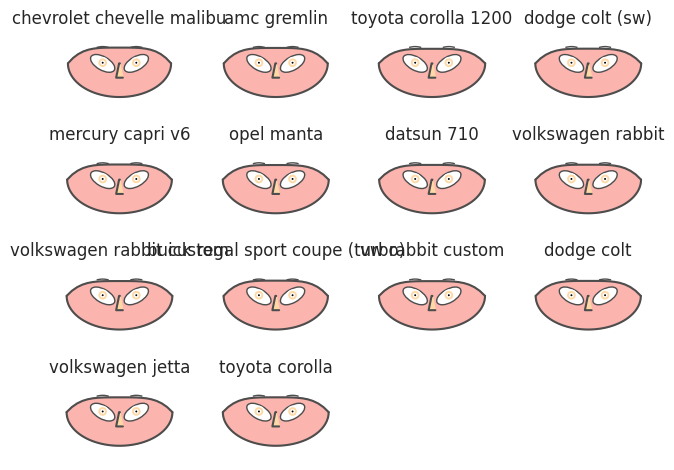

In [ ]:
fig = chernoff_face(data=datos,
                    titles=list(etiquetas),
                    color_mapper=matplotlib.cm.Pastel1)

# Mostrarlo
fig.tight_layout()
matplotlib.pyplot.show()

En este caso los autos tienes variables similares por ende no se logran ver cambios notorios en los atributos

### Veamos este caso aplicado sobre criminalidad:
https://flowingdata.com/2010/08/31/how-to-visualize-data-with-cartoonish-faces/crime-chernoff-faces-by-state-edited-2/